# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises, text describing your code and answering any questions included in the exercise descriptions should be provided as part of your submitted solution. (Total Marks for this Assessment is 40)

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will not be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. Part of this assessment requires you to write an inference script that evaluates the regression models you have trained on the final test data set such that we are able to run the inference script ourselves on the test data (you can use the example test data to verify that it works prior to submission).

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

NAME - AKASH MODI
ID - 201578780
EMAIL - sc21amm@leeds.ac.uk

In [54]:
import os
import pandas as pd

root_dir = './' # this is to be defined by you 
local_path = '' # store the related data files in this folder

data_dir = root_dir + local_path
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

In [55]:
train = pd.read_csv(training_data_path)
target = pd.read_csv(training_targets_path)
test = pd.read_csv(test_data_path)
target_2 = pd.read_csv(test_targets_path)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'popEst2015'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>],
       [<AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>],
       [<AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctSomeCol18_24'}>,
        <AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25_O

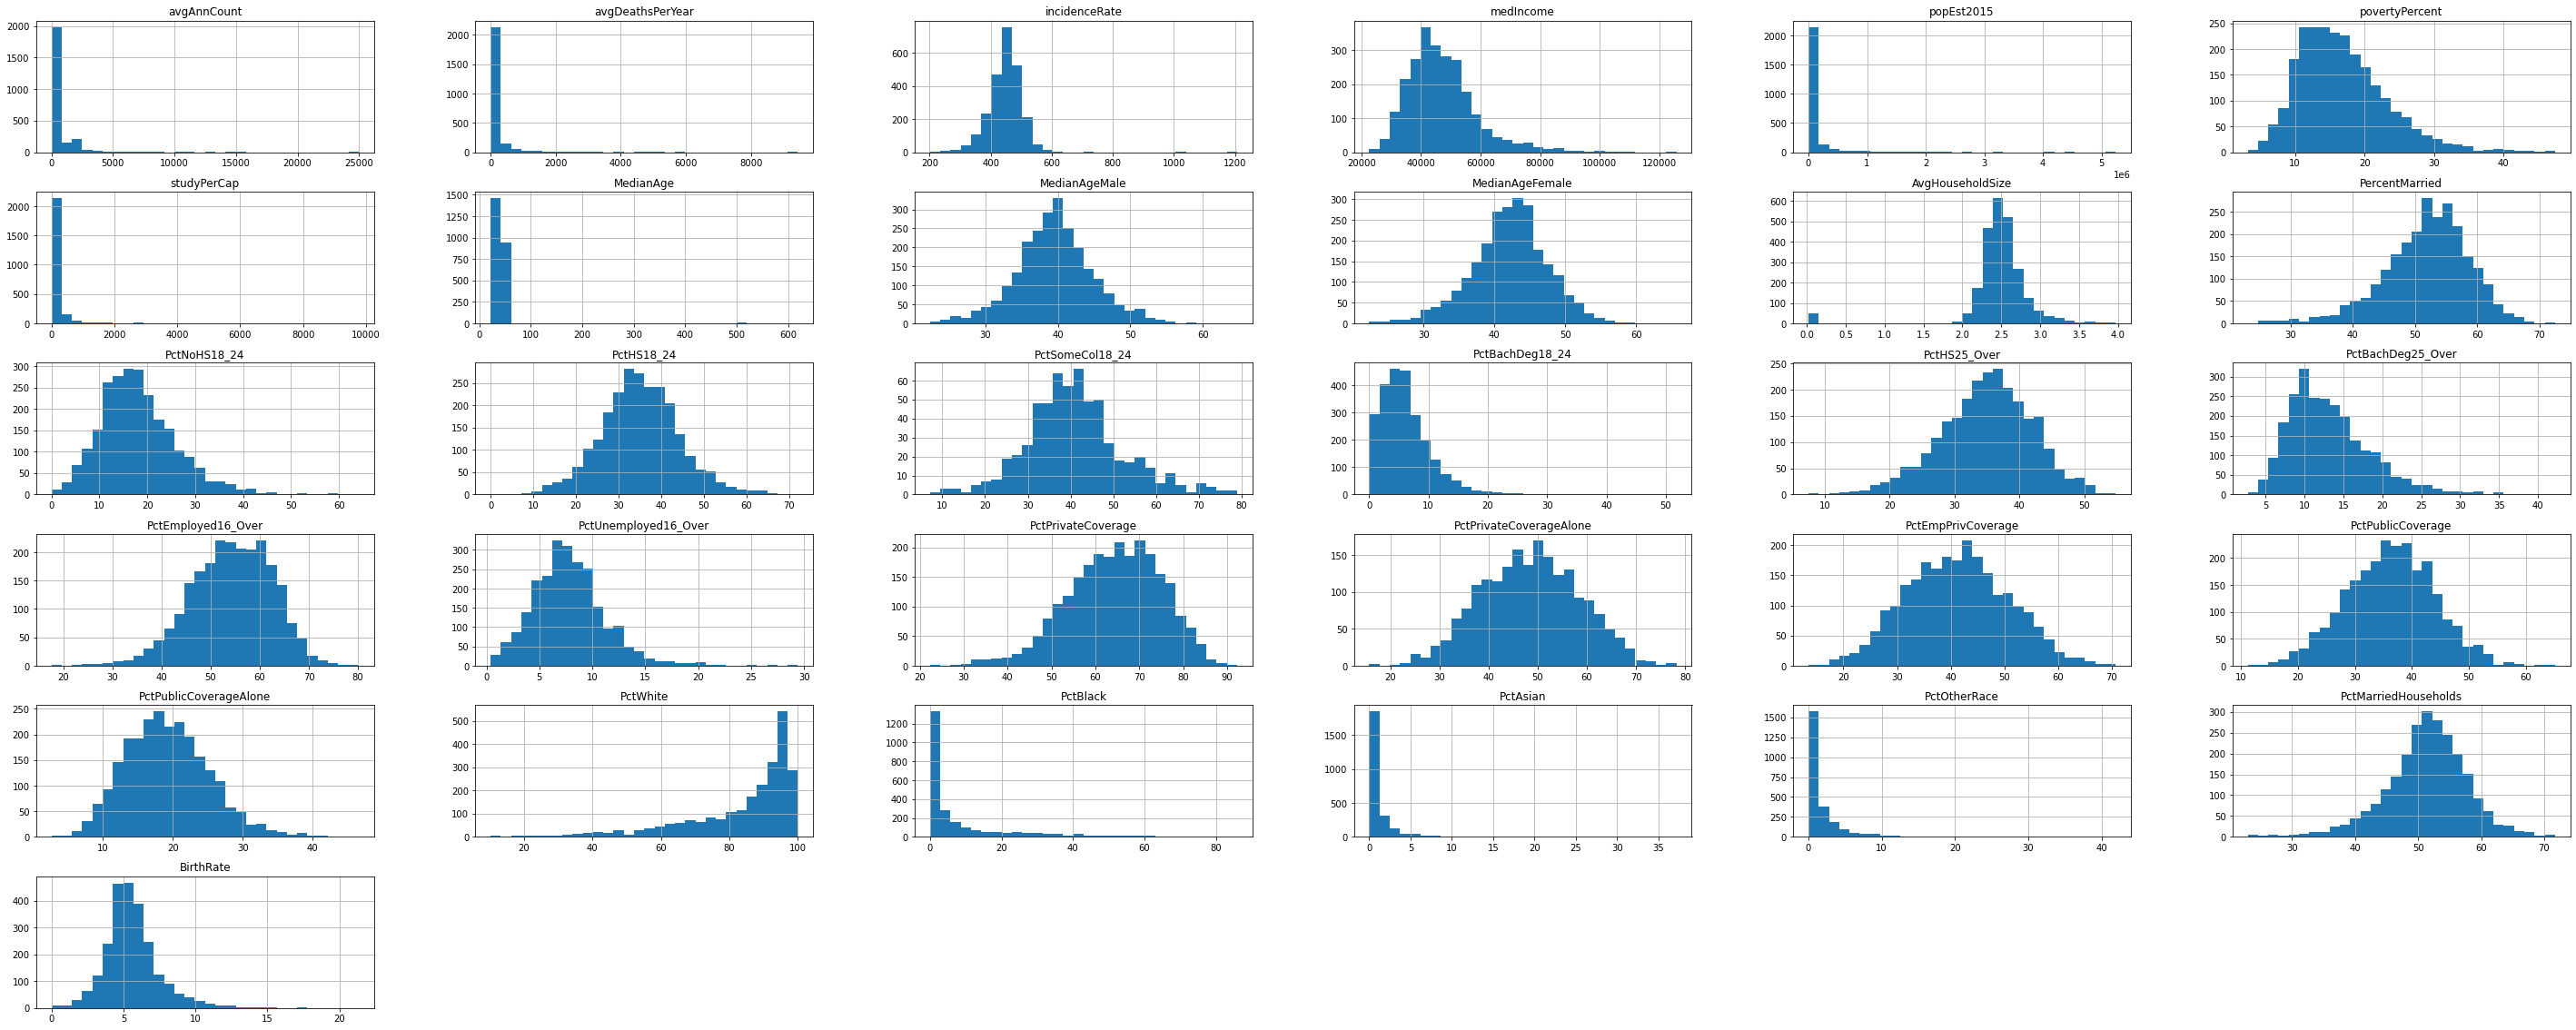

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

train.hist(bins=30,figsize=(50,20))

After plotting histograms of all features, I can see good number of outliers. These features have many unusual values like IncidenceRate feature,in this there is a value between 600-800 then slight above 1000 then slight above 1200, similarly in AverageAnnCount, AvgDeathsPerYear and many more. Almost all the features have outliers. 
Apart from this AvgHouseholdSize, has zero value, which is quite shocking as it should have minimum single member.

In [56]:
train_new = train.copy()
train_new['TARGET'] = target['TARGET_deathRate']
correlations = train_new.corr()
correlations['TARGET'] = correlations['TARGET'].abs()
correlations = correlations.sort_values('TARGET',ascending=False)
correlations['TARGET']

TARGET                     1.000000
PctBachDeg25_Over          0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                  0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over         0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage         0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone    0.355050
PctMarriedHouseholds       0.290645
PctBachDeg18_24            0.284566
PctHS18_24                 0.266285
PercentMarried             0.266153
PctEmpPrivCoverage         0.259006
PctBlack                   0.236380
PctSomeCol18_24            0.186140
PctOtherRace               0.182602
PctAsian                   0.181948
PctWhite                   0.174521
avgAnnCount                0.150019
popEst2015                 0.130122
avgDeathsPerYear           0.094048
PctNoHS18_24               0.090565
BirthRate                  0.088543
AvgHouseholdSize           0

Top 5 features which has strongest correlations are - 
'PctBachDeg25_Over',
 'incidenceRate',
 'PctPublicCoverageAlone',
 'medIncome',
 'povertyPercent'

array([[<AxesSubplot:xlabel='TARGET', ylabel='TARGET'>,
        <AxesSubplot:xlabel='PctBachDeg25_Over', ylabel='TARGET'>,
        <AxesSubplot:xlabel='incidenceRate', ylabel='TARGET'>,
        <AxesSubplot:xlabel='PctPublicCoverageAlone', ylabel='TARGET'>,
        <AxesSubplot:xlabel='medIncome', ylabel='TARGET'>,
        <AxesSubplot:xlabel='povertyPercent', ylabel='TARGET'>],
       [<AxesSubplot:xlabel='TARGET', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot:xlabel='PctBachDeg25_Over', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot:xlabel='incidenceRate', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot:xlabel='PctPublicCoverageAlone', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot:xlabel='medIncome', ylabel='PctBachDeg25_Over'>,
        <AxesSubplot:xlabel='povertyPercent', ylabel='PctBachDeg25_Over'>],
       [<AxesSubplot:xlabel='TARGET', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='PctBachDeg25_Over', ylabel='incidenceRate'>,
        <AxesSubplot:xlabel='inci

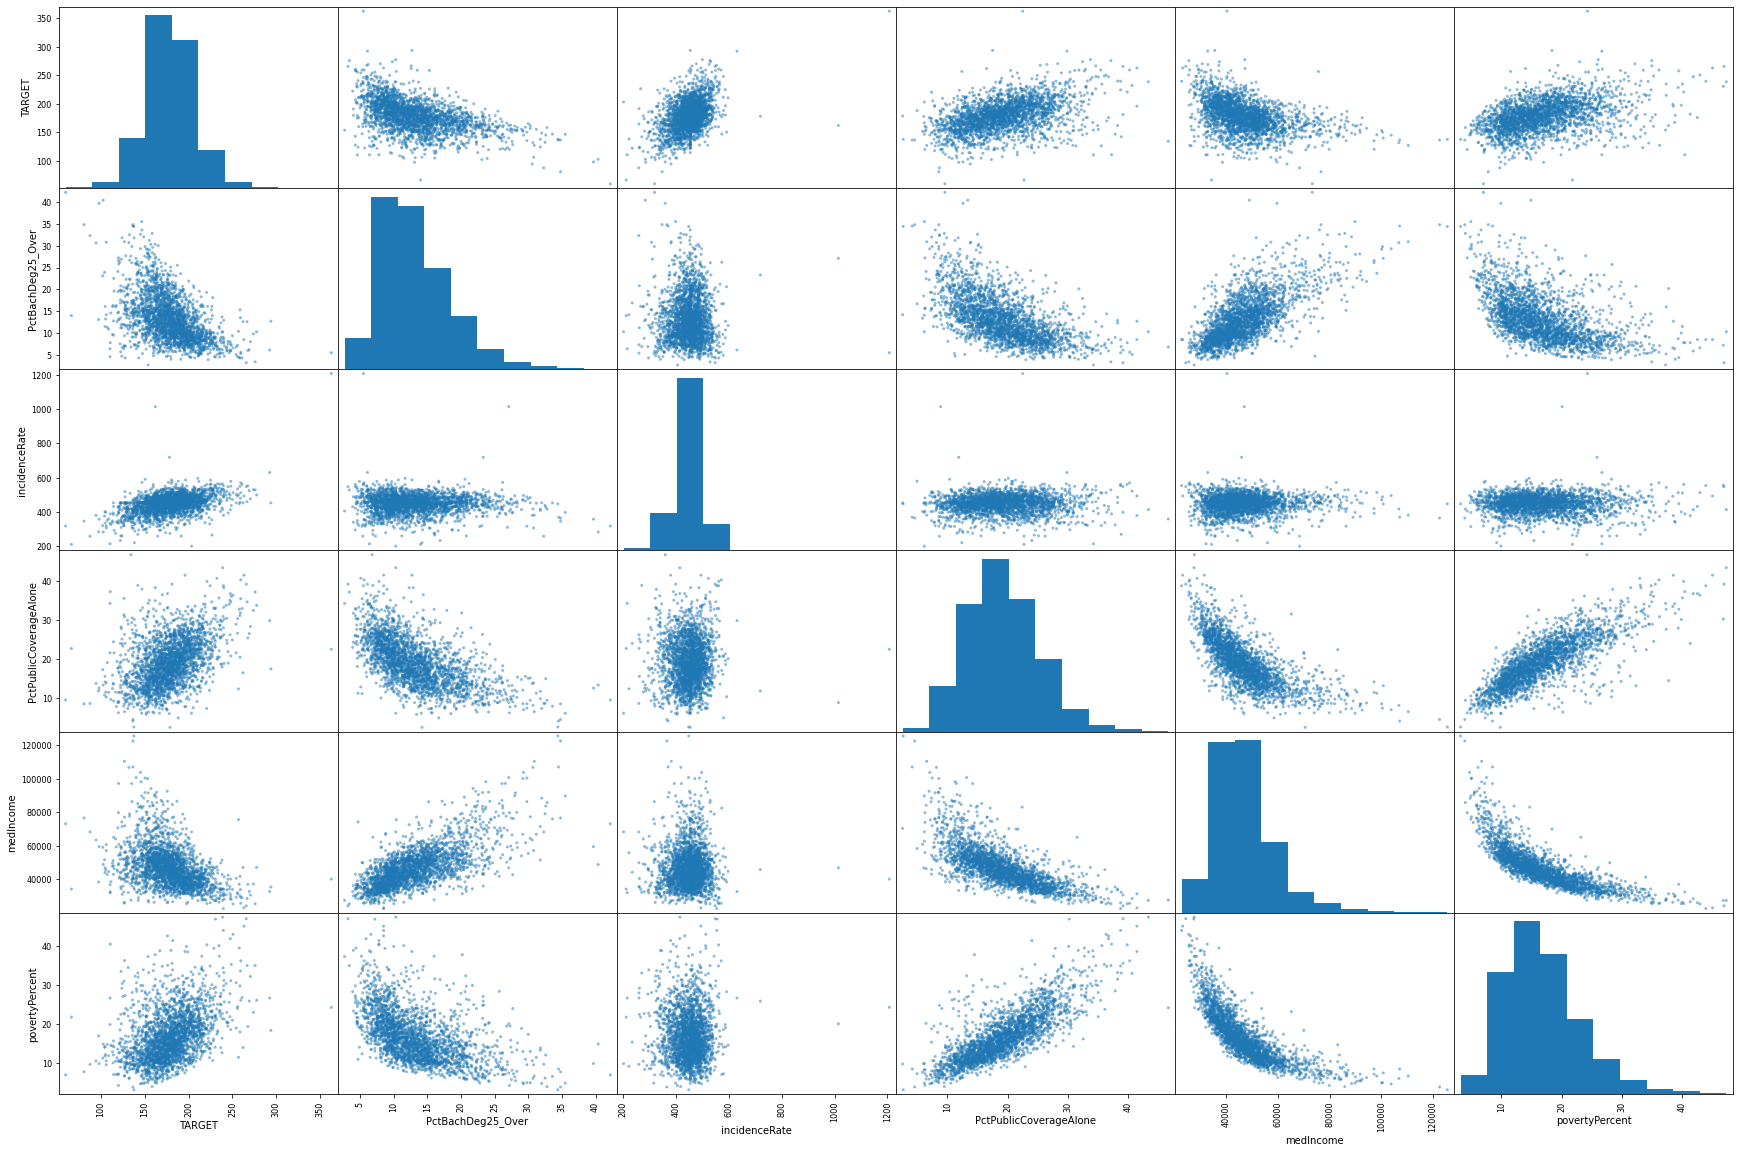

In [57]:
from pandas.plotting import scatter_matrix
top_5 = list(correlations['TARGET'][0:6].index)
scatter_matrix(train_new[top_5],figsize=(30,20))

In the above columns, PctPublicCoverageAlone and PovertyPercent have high correlation. In addition to it, MedIncome and PctPublicCoverganceAlone have high correlation.

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

data = num_pipeline.fit_transform(train)
print(data[1])

[-0.37591237 -0.31273884 -0.80200754  0.02420626 -0.27155414 -0.47917702
 -0.29102996 -0.10337403  0.03853928  0.10018547 -0.35417811 -0.10551435
  0.20054645 -0.1564507  -0.03264411 -0.09932687  0.05728384  1.15282912
  0.92817791 -1.23264599  1.02394836  0.89872493  0.59396451 -0.60086462
 -1.03328556  0.5281407  -0.48101852 -0.24537647 -0.31647103 -0.05251527
  0.34857181]


# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [59]:
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

data_2 = num_pipeline.fit_transform(test)

lin_reg = LinearRegression()
lin_reg.fit(data, target)
train_predictions = lin_reg.predict(data)
test_predictions = lin_reg.predict(data_2)
training_accuracy1 = lin_reg.score(data, target)
print('     Ordinary Least Squares (OLS)        ')
print("Training Data Mean Squared Error = ", np.sqrt(mean_squared_error(target,train_predictions)))
print("Testing Data Mean Squared Error = ",np.sqrt(mean_squared_error(target_2,test_predictions))) 

     Ordinary Least Squares (OLS)        
Training Data Mean Squared Error =  18.910799278666417
Testing Data Mean Squared Error =  22.541672537039453


In [60]:
ridge_reg = RidgeCV( alphas = np.arange(1, 90, 10) , fit_intercept=True)
ridge_reg.fit(data, target)
train_predictions = ridge_reg.predict(data)
test_predictions = ridge_reg.predict(data_2)
training_accuracy2 = ridge_reg.score(data, target)
print('     Ridge Model    ')
print("Training Data Mean Squared Error = ", np.sqrt(mean_squared_error(target,train_predictions)))
print("Testing Data Mean Squared Error = ",np.sqrt(mean_squared_error(target_2,test_predictions))) 

     Ridge Model    
Training Data Mean Squared Error =  18.923034414028486
Testing Data Mean Squared Error =  22.54822035128012


In [61]:
lasso_reg = LassoCV(alphas=np.arange(0.1, 0.9, 0.1), fit_intercept=True)
lasso_reg.fit(data,target)
train_predictions = lasso_reg.predict(data)
test_predictions = lasso_reg.predict(data_2)
training_accuracy3 = lasso_reg.score(data, target)
print('     Lasso Model     ')
print("Training Data Mean Squared Error = ", np.sqrt(mean_squared_error(target,train_predictions)))
print("Testing Data Mean Squared Error = ",np.sqrt(mean_squared_error(target_2,test_predictions))) 

     Lasso Model     
Training Data Mean Squared Error =  18.9850632378237
Testing Data Mean Squared Error =  22.54595751398525


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [62]:
print('Model scores =  OLS: ', training_accuracy1 , ' Ridge: ', training_accuracy2, ' Lasso: ', training_accuracy3)

Model scores =  OLS:  0.5279860494732327  Ridge:  0.5273750734132912  Lasso:  0.5242715101587283


I created a large lists of numbers and selected the best one using Cross-Validation of models LassoCV and RidgeCV.
The best model among the three is Ordinary Least Squares (OLS).

# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

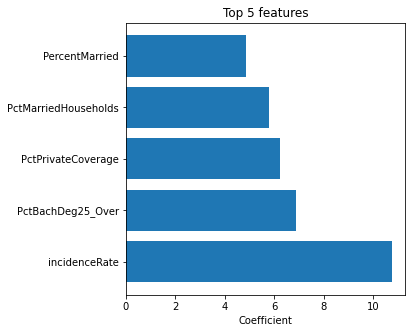

In [64]:
cofs = np.abs(lasso.coef_)
cols = list(train)
top_rel_feat = pd.DataFrame({"cols": cols, "cofs": cofs}).sort_values(by="cofs", ascending=False)
plt.figure(figsize=(5,5))
plt.barh(top_rel_feat['cols'][:5],top_rel_feat['cofs'][:5])
plt.xlabel('Coefficient')
plt.title('Top 5 features')
plt.show()

# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (14 marks)

In [67]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()

forest.fit(data,target)
train_predictions = forest.predict(data)
print('     Forest    ')
print('Forest train score : ', forest.score(data, target))
print("Training Data Mean Squared Error = ", np.sqrt(mean_squared_error(target,train_predictions)))
test_predictions = forest.predict(data_2)
print("Testing Data Mean Squared Error = ",np.sqrt(mean_squared_error(target_2,test_predictions))) 

<ipython-input-67-d955ebdaa0be>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(data,target)


     Forest    
Forest train score :  0.9336933411845212
Training Data Mean Squared Error =  7.087793236826717
Testing Data Mean Squared Error =  21.052712028778313


In [66]:
feature_importances = forest.feature_importances_
sorted(zip(feature_importances,list(train)),reverse=True)[0:5]

[(0.21906218402616265, 'PctBachDeg25_Over'),
 (0.20394844494896258, 'incidenceRate'),
 (0.044973326036777894, 'PctHS25_Over'),
 (0.0443685377454127, 'medIncome'),
 (0.03746121191395368, 'avgDeathsPerYear')]

Above are the five most important features for Random Forest.
The most common feature in both the models are PctBachDeg25_Over and incidenceRate.
The Training Data Mean Squared Error for Random Forest is 7.09 on the other hand Training Data Mean Squared Error for OLS is 18.91. thus Random Forest shows better results.

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. But the format of this "unseen" test data will be identical to the example test data provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [53]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)

## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions

forest=RandomForestRegressor()
forest.fit(data, target)

data_3 = num_pipeline.fit_transform(test_data)

predictions = forest.predict(data_3)
print('     Forest     ')
print('Forest train score : ', forest.score(data_3, test_targets))
print("Mean Squared Error = ", np.sqrt(mean_squared_error(test_targets,predictions)))

<ipython-input-53-480c905d76b3>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(data, target)


     Forest     
Forest train score :  0.3618345437288858
Mean Squared Error =  21.97303931564013
